In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from evojax.datasets import digit, fashion, kuzushiji, cifar

In [217]:
df = pd.read_csv("./results/baselines_0925_1830.csv", index_col=(0, 1, 2), header=0)
mean_test = df.loc[pd.IndexSlice[:, 'test', :], :].groupby(level=[0, 1]).mean().droplevel(1)
# mean_test = df.loc[pd.IndexSlice[:, 'test', :], :].iloc[:, -1].groupby(level=[0, 1]).mean()

In [218]:
mean_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
baseline,0.776525,0.810156,0.825781,0.834776,0.838563,0.841607,0.840522,0.840533,0.838487,0.840782,0.839681,0.839307,0.839876,0.840820,0.839985,0.840972,0.839925,0.840451,0.840587,0.838764
dropout,0.767025,0.802892,0.819857,0.829628,0.836410,0.840435,0.844081,0.846859,0.848400,0.850521,0.850895,0.852083,0.852333,0.853185,0.851709,0.853836,0.852333,0.852935,0.853385,0.853331
l1_pruning,0.775217,0.808615,0.824452,0.834359,0.837598,0.840256,0.840777,0.840809,0.839019,0.841113,0.839714,0.838813,0.837999,0.839366,0.837891,0.837863,0.837717,0.839160,0.838260,0.839052
l1_reg,0.775939,0.809212,0.825076,0.833507,0.839214,0.841607,0.840831,0.841585,0.839513,0.841509,0.839909,0.839979,0.839735,0.840120,0.840262,0.838688,0.840234,0.840484,0.840641,0.839708
task_labels,0.775911,0.811757,0.826769,0.835992,0.840451,0.840142,0.841216,0.841319,0.840397,0.839789,0.839008,0.839480,0.839746,0.838732,0.840061,0.839627,0.840148,0.839806,0.838802,0.840110


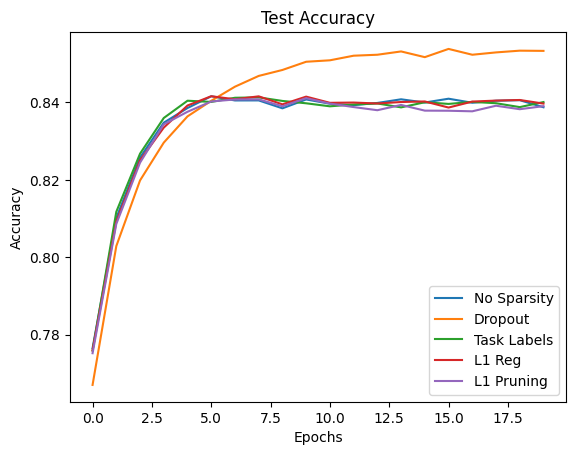

In [219]:
epochs = range(20)
plt.plot(epochs, mean_test.loc['baseline'], label='No Sparsity')
plt.plot(epochs, mean_test.loc['dropout'], label='Dropout')
plt.plot(epochs, mean_test.loc['task_labels'], label='Task Labels')
plt.plot(epochs, mean_test.loc['l1_reg'], label='L1 Reg')
plt.plot(epochs, mean_test.loc['l1_pruning'], label='L1 Pruning')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./images/baseline_test_acc.pdf')

In [27]:
df2 = pd.read_csv("./results/baselines_early_stopping_0924_2038.csv", index_col=(0, 1, 2), header=0)
df2 = df.fillna(method='ffill', axis=1)

In [36]:
mean_final_value = df2.loc[pd.IndexSlice[:, ['train', 'validation', 'test'], :], :].iloc[:, -1].groupby(level=[0, 1]).mean()
std_final_value = df2.loc[pd.IndexSlice[:, ['train', 'validation', 'test'], :], :].iloc[:, -1].groupby(level=[0, 1]).std()
std_final_value.rename('STD', inplace=True)
mean_final_value.rename('Mean', inplace=True)

std_and_mean = pd.concat([mean_final_value, std_final_value], axis=1)

In [56]:
baseline_results = std_and_mean.unstack(1).swaplevel(axis=1)[['train', 'validation', 'test']]
baseline_results = baseline_results.loc[['baseline', 'task_labels', 'l1_reg', 'l1_pruning', 'dropout']]
baseline_results.rename({'baseline': 'No Sparsity', 'task_labels': 'No Sparsity with Task Labels',
                         'l1_reg': 'L1 Regularisation', 'l1_pruning': 'L1 Pruning',
                         'dropout': 'Dropout'}, inplace=True, axis=0)
baseline_results.rename({'train': 'Train', 'validation': 'Validation', 'test': 'Test'}, inplace=True, axis=1)

In [57]:
print(baseline_results.style.format('{:.3f}').to_latex())

\begin{tabular}{lrrrrrr}
 & \multicolumn{2}{r}{Train} & \multicolumn{2}{r}{Validation} & \multicolumn{2}{r}{Test} \\
 & Mean & STD & Mean & STD & Mean & STD \\
No Sparsity & 0.933 & 0.014 & 0.870 & 0.004 & 0.840 & 0.004 \\
No Sparsity with Task Labels & 0.934 & 0.018 & 0.870 & 0.002 & 0.841 & 0.004 \\
L1 Regularisation & 0.944 & 0.014 & 0.869 & 0.004 & 0.839 & 0.006 \\
L1 Pruning & 0.938 & 0.022 & 0.868 & 0.004 & 0.838 & 0.007 \\
Dropout & 0.914 & 0.021 & 0.878 & 0.004 & 0.850 & 0.004 \\
\end{tabular}



In [2]:
def find_std_mean(df):
    mean_final_value = df.loc[pd.IndexSlice[:, ['train', 'validation', 'test'], :], :].iloc[:, -1].groupby(level=[0, 1]).mean()
    std_final_value = df.loc[pd.IndexSlice[:, ['train', 'validation', 'test'], :], :].iloc[:, -1].groupby(level=[0, 1]).std()
    std_final_value.rename('STD', inplace=True)
    mean_final_value.rename('Mean', inplace=True)

    std_and_mean = pd.concat([mean_final_value, std_final_value], axis=1).droplevel(0).loc[['train', 'validation', 'test']]
    std_and_mean.rename({'train': 'Train', 'validation': 'Validation', 'test': 'Test'}, inplace=True, axis=0)
    return std_and_mean
    # print(std_and_mean.style.format('{:.3f}').to_latex())

In [3]:
soft_no_stopping = pd.read_csv("./results/evo_soft_0924_2134.csv", index_col=(0, 1, 2), header=0)
soft_early_stopping = pd.read_csv("./results/evo_soft_es_0925_0811.csv",
                                  index_col=(0, 1, 2), header=0).fillna(method='ffill', axis=1)
soft_ns = find_std_mean(soft_no_stopping)
soft_es = find_std_mean(soft_early_stopping)
# print(std_and_mean3.style.format('{:.3f}').to_latex())

In [4]:
hard_no_stopping = pd.read_csv("./results/evo_hard_0924_2325.csv", index_col=(0, 1, 2), header=0)
hard_early_stopping = pd.read_csv("./results/evo_hard_es_0925_0810.csv",
                                          index_col=(0, 1, 2), header=0).fillna(method='ffill', axis=1)
hard_ns = find_std_mean(hard_no_stopping)
hard_es = find_std_mean(hard_early_stopping)
# print(std_and_mean3.style.format('{:.3f}').to_latex())

In [28]:
algo_1_hard_no_stopping = pd.read_csv("./results/algo_1_results_run_0925_2027.csv", index_col=(0, 1, 2), header=0).iloc[:, :6]
algo_1_results = find_std_mean(algo_1_hard_no_stopping)

In [24]:
algo_1_val = algo_1_hard_no_stopping.loc[pd.IndexSlice[:, 'validation', :], :].mean()
algo_1_test = algo_1_hard_no_stopping.loc[pd.IndexSlice[:, 'test', :], :].mean()

In [29]:
algo_1_results

,Mean,STD
Train,0.909040,0.009025
Validation,0.864502,0.004830
Test,0.832536,0.004952


In [26]:
algo_1_val

0     0.817960
1     0.841406
2     0.854292
3     0.859189
4     0.862562
5     0.864502
6     0.865265
7     0.864986
8     0.865239
9     0.862442
10    0.862429
11    0.862607
12    0.860738
13    0.859291
14    0.862349
15    0.861958
16    0.863667
17    0.864089
18    0.864169
19    0.865212
dtype: float64

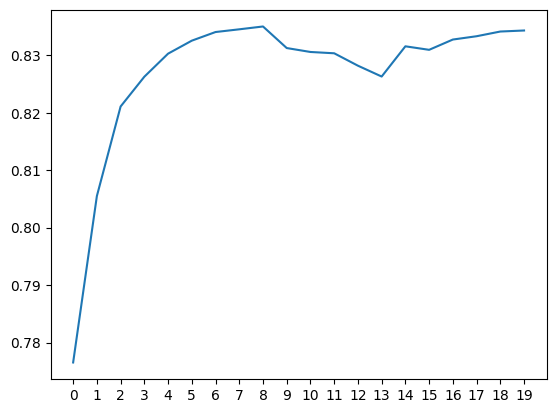

In [25]:
plt.plot(algo_1_test)

In [30]:
algo1_vs_algo2 = pd.concat({'Algorithm 1': algo_1_results, 'Algorithm 2': hard_es}, axis=0).stack().unstack(1).unstack(1)
print(algo1_vs_algo2.style.format('{:.3f}').to_latex())

\begin{tabular}{lrrrrrr}
 & \multicolumn{2}{r}{Train} & \multicolumn{2}{r}{Validation} & \multicolumn{2}{r}{Test} \\
 & Mean & STD & Mean & STD & Mean & STD \\
Algorithm 1 & 0.909 & 0.009 & 0.865 & 0.005 & 0.833 & 0.005 \\
Algorithm 2 & 0.930 & 0.010 & 0.871 & 0.003 & 0.842 & 0.004 \\
\end{tabular}



In [5]:
soft_no_stopping_dropout = pd.read_csv("./results/evo_soft_dropout_0924_2134.csv", index_col=(0, 1, 2), header=0)
soft_early_stopping_dropout = pd.read_csv("./results/evo_soft_dropout_es_0925_0812.csv",
                                          index_col=(0, 1, 2), header=0).fillna(method='ffill', axis=1)
soft_ns_dropout = find_std_mean(soft_no_stopping_dropout)
soft_es_dropout = find_std_mean(soft_early_stopping_dropout)
# print(std_and_mean3.style.format('{:.3f}').to_latex())

In [6]:
hard_no_stopping_dropout = pd.read_csv("./results/evo_hard_dropout_0924_2325.csv", index_col=(0, 1, 2), header=0)
hard_early_stopping_dropout = pd.read_csv("./results/evo_hard_dropout_es_0925_0810.csv",
                                          index_col=(0, 1, 2), header=0).fillna(method='ffill', axis=1)
hard_ns_dropout = find_std_mean(hard_no_stopping_dropout)
hard_es_dropout = find_std_mean(hard_early_stopping_dropout)
# print(std_and_mean3.style.format('{:.3f}').to_latex())

In [168]:
hard_vs_soft = pd.concat({'Soft': soft_es, 'Hard': hard_es}, axis=0).stack().unstack(1).unstack(1)
hard_vs_soft

Train           Validation                Test          
          Mean       STD       Mean       STD      Mean       STD
Soft  0.943198  0.010126   0.870952  0.003878  0.841526  0.005221
Hard  0.929886  0.009653   0.871067  0.002770  0.841547  0.004129

In [169]:
print(hard_vs_soft.style.format('{:.3f}').to_latex())

\begin{tabular}{lrrrrrr}
 & \multicolumn{2}{r}{Train} & \multicolumn{2}{r}{Validation} & \multicolumn{2}{r}{Test} \\
 & Mean & STD & Mean & STD & Mean & STD \\
Soft & 0.943 & 0.010 & 0.871 & 0.004 & 0.842 & 0.005 \\
Hard & 0.930 & 0.010 & 0.871 & 0.003 & 0.842 & 0.004 \\
\end{tabular}



In [170]:
dropout_vs_no_dropout = pd.concat({'No Dropout': hard_es, 'Dropout': hard_es_dropout}, axis=0).stack().unstack(1).unstack(1)
dropout_vs_no_dropout

Train           Validation                Test          
                Mean       STD       Mean       STD      Mean       STD
No Dropout  0.929886  0.009653   0.871067  0.002770  0.841547  0.004129
Dropout     0.900544  0.012278   0.878081  0.003102  0.850553  0.004036

In [171]:
print(dropout_vs_no_dropout.style.format('{:.3f}').to_latex())

\begin{tabular}{lrrrrrr}
 & \multicolumn{2}{r}{Train} & \multicolumn{2}{r}{Validation} & \multicolumn{2}{r}{Test} \\
 & Mean & STD & Mean & STD & Mean & STD \\
No Dropout & 0.930 & 0.010 & 0.871 & 0.003 & 0.842 & 0.004 \\
Dropout & 0.901 & 0.012 & 0.878 & 0.003 & 0.851 & 0.004 \\
\end{tabular}



In [209]:
baselines = pd.read_csv("./results/baselines_0924_2038.csv", index_col=(0, 1, 2), header=0)
baseline_compare = pd.concat([baselines.loc[['baseline', 'dropout']], hard_no_stopping, hard_no_stopping_dropout], axis=0)
all_tests = baseline_compare.loc[pd.IndexSlice[:, 'test', :], :]
mean_test_acc = all_tests.groupby(level=0).mean()

In [210]:
mean_test_acc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
baseline,0.776525,0.810156,0.825781,0.834776,0.838563,0.841607,0.840522,0.840533,0.838487,0.840782,0.839681,0.839307,0.839876,0.840820,0.839985,0.840972,0.839925,0.840451,0.840587,0.838764
dropout,0.767025,0.802892,0.819857,0.829628,0.836410,0.840435,0.844081,0.846859,0.848400,0.850521,0.850895,0.852083,0.852333,0.853185,0.851709,0.853836,0.852333,0.852935,0.853385,0.853331
masking_hard,0.769048,0.806662,0.822537,0.834543,0.838873,0.840370,0.841536,0.842725,0.841406,0.842415,0.840565,0.842421,0.840457,0.840202,0.840701,0.841287,0.839545,0.840733,0.841303,0.841835
masking_hard_dropout,0.759684,0.796745,0.815435,0.826139,0.834283,0.836860,0.843207,0.845703,0.848041,0.850635,0.851573,0.853233,0.854096,0.854660,0.854519,0.855968,0.854856,0.855447,0.855197,0.855322


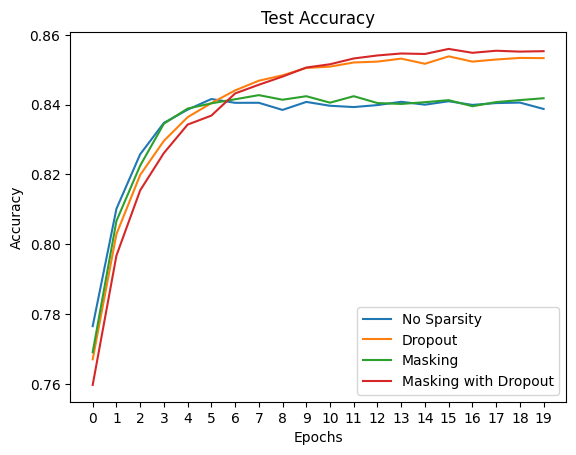

In [211]:
epochs = mean_test_acc.columns
plt.plot(epochs, mean_test_acc.loc['baseline'], label='No Sparsity')
plt.plot(epochs, mean_test_acc.loc['dropout'], label='Dropout')
plt.plot(epochs, mean_test_acc.loc['masking_hard'], label='Masking')
plt.plot(epochs, mean_test_acc.loc['masking_hard_dropout'], label='Masking with Dropout')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./images/masking_vs_baselines.pdf')

In [203]:
baselines = pd.read_csv("./results/baselines_0924_2038.csv", index_col=(0, 1, 2), header=0)
baseline_compare = pd.concat([baselines.loc[['dropout']], hard_no_stopping_dropout], axis=0)
all_tests = baseline_compare.loc[pd.IndexSlice[:, [digit, fashion, kuzushiji, cifar], :], :]
mean_test_acc = all_tests.groupby(level=(0,1)).mean()

In [206]:
subset_delta = mean_test_acc.loc['masking_hard_dropout'] - mean_test_acc.loc['dropout']

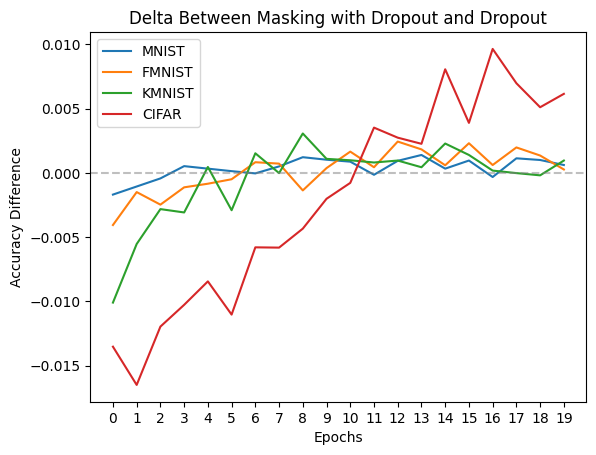

In [223]:
epochs = subset_delta.columns
plt.plot(epochs, subset_delta.loc[digit], label=digit)
plt.plot(epochs, subset_delta.loc[fashion], label=fashion)
plt.plot(epochs, subset_delta.loc[kuzushiji], label=kuzushiji)
plt.plot(epochs, subset_delta.loc[cifar], label=cifar)
plt.axhline(y=0., color='grey', linestyle='--', alpha=0.5)
plt.title('Delta Between Masking with Dropout and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Difference')
plt.legend()
plt.savefig('./images/per_dataset_delta.pdf')

In [39]:
baseline_dict = dict(
    batch_size=1024,
    cnn_epochs=20,
    cnn_lr=1e-3,
    dropout_rate=0.5,
    l1_reg_lambda=3e-5,
    l1_pruning_proportion=0.05)
baseline_params = pd.DataFrame.from_dict(baseline_dict, orient='index').astype(str)

In [40]:
print(baseline_params.style.to_latex())

\begin{tabular}{ll}
 & 0 \\
batch_size & 1024.0 \\
cnn_epochs & 20.0 \\
cnn_lr & 0.001 \\
dropout_rate & 0.5 \\
l1_reg_lambda & 3e-05 \\
l1_pruning_proportion & 0.05 \\
\end{tabular}



In [41]:
masking_params = dict(algo="OpenES",
                      pop_size=8,
                      mask_threshold=0.5,
                      batch_size = 1024.0,
                      max_iter=720,
                      max_steps=50,
                      center_lr=0.0825,
                      std_lr=0.08,
                      init_std=0.045)
masking_params_df = pd.DataFrame.from_dict(masking_params, orient='index').astype(str)
print(masking_params_df.style.to_latex())

\begin{tabular}{ll}
 & 0 \\
algo & OpenES \\
pop_size & 8 \\
mask_threshold & 0.5 \\
batch_size & 1024.0 \\
max_iter & 720 \\
max_steps & 50 \\
center_lr & 0.0825 \\
std_lr & 0.08 \\
init_std & 0.045 \\
\end{tabular}

